In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,timedelta
register_matplotlib_converters()

Generate Some Data

yt = 50 + 0.4Et-1 + 0.3Et-2 +Et

Et~N(0,1)

In [2]:
errors =np.random.normal(0,1,400)

In [3]:
date_index =pd.date_range(start='9/1/2019',end ='1/1/2020')

In [4]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu +0.4*errors[t-1] + 0.3*errors[t-2]+ errors[t])

In [5]:
series =pd.Series(series,date_index)
series =series.asfreq(pd.infer_freq(series.index))

In [6]:
idx =pd.DatetimeIndex(['2020-12-25','2020-12-27','2020-12-29'])
pd.infer_freq(idx)

'2D'

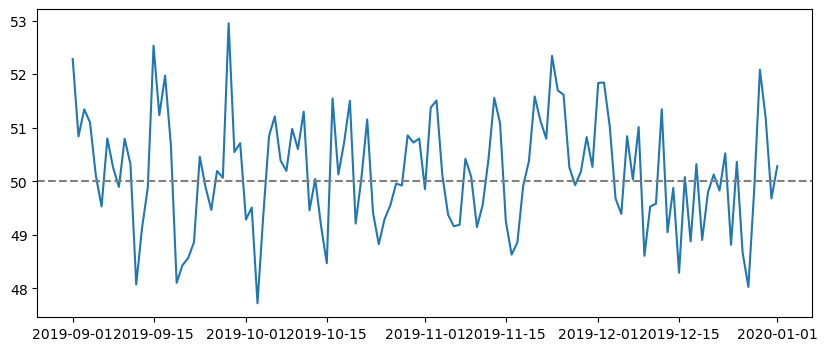

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--',color='gray')

In [8]:
def calc_corr(series,lag):
    return pearsonr(series[:-lag],series[lag:])[0]

<BarContainer object of 10 artists>

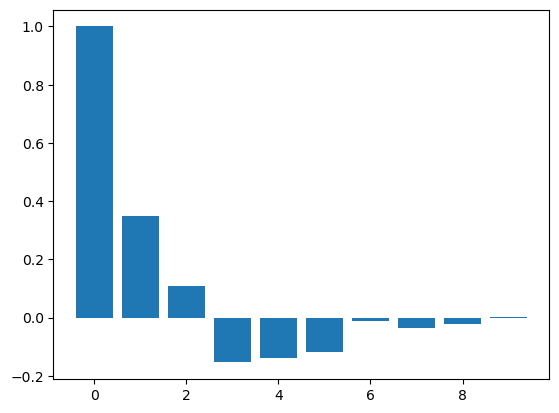

In [9]:
acf_vals =acf(series)
num_lags =10
plt.bar(range(num_lags),acf_vals[:num_lags])

<BarContainer object of 20 artists>

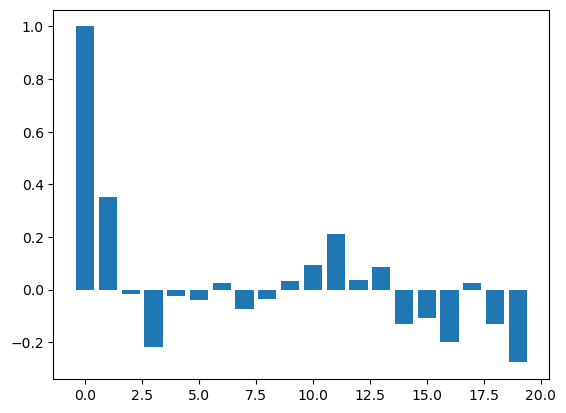

In [10]:
pacf_vals=pacf(series)
num_lags= 20
plt.bar(range(num_lags),pacf_vals[:num_lags])

In [11]:
#train and test set
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [12]:
#create model
#model  ARIMA(train_data,order=(0,0,2))

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data,order=(0,0,2))

In [13]:
#fit the model
model_fit = model.fit()

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -168.076
Date:                Tue, 21 Mar 2023   AIC                            344.153
Time:                        15:47:21   BIC                            355.336
Sample:                    09-01-2019   HQIC                           348.695
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1893      0.143    351.873      0.000      49.910      50.469
ma.L1          0.3846      0.107      3.605      0.000       0.175       0.594
ma.L2          0.2519      0.098      2.582      0.0

In [21]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [22]:
#get prediction and residuals
predicitions = model_fit.predict(start=pred_start_date,end=pred_end_date)

In [24]:
residuals =test_data - predicitions

NameError: name 'predictions' is not defined

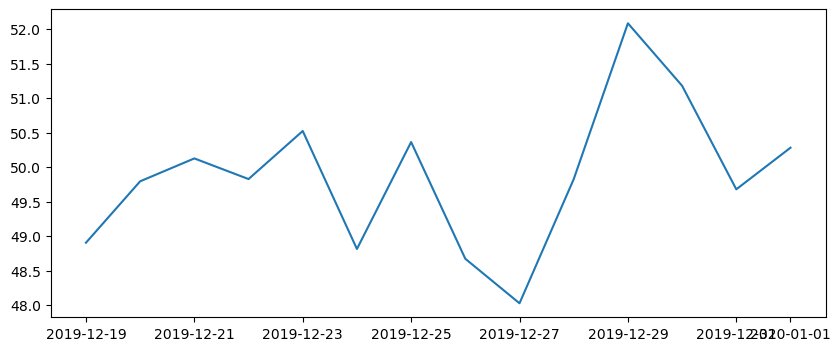

In [26]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data','Predictions'), fontsize=16)

In [27]:
print('Mean Absoulte Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absoulte Percent Error: 0.0114


In [28]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.7402997484442632


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_20840\2989390386.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\Asus\AppData\Local\Temp\ipykernel_20840\2989390386.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv',header=0,parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)


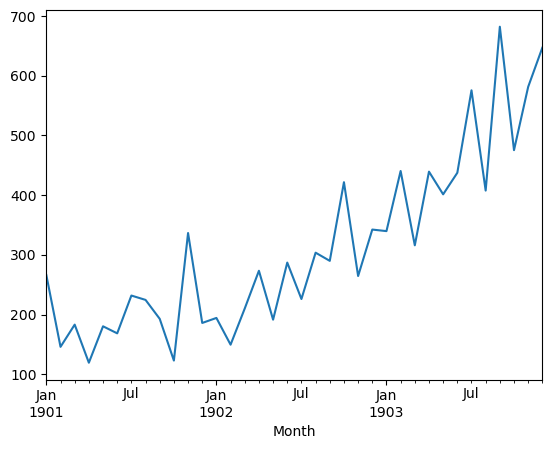

In [30]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv',header=0,parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [36]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
#load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv',header=0,parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
#fit model
model =ARIMA(series,order=(5,1,0))
model_fit = model.fit()
    #summary of fit model
print(model_fit.summary())
    #line plot of residuals

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 21 Mar 2023   AIC                            408.969
Time:                        16:55:14   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

C:\Users\Asus\AppData\Local\Temp\ipykernel_20840\2397983055.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\Asus\AppData\Local\Temp\ipykernel_20840\2397983055.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv',header=0,parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)
